In [1]:
import pandas as pd
import numpy as np

house = pd.read_csv("/Users/josemontoro/data/personal/springboard/Capstone/house_prices/house-prices-advanced-regression-techniques/train.csv")


# Set ipython's max row display
pd.set_option('display.max_row', 1000)

# Set iPython's max column width to 100
pd.set_option('display.max_columns', 100)

In [2]:
# For the rows that have true missing values (MCAR), in Electrical, BsmtFinType2, BsmtExposure, we'll input the most common values

house.at[1379,'Electrical'] = 'SBrkr'
house.at[332, 'BsmtFinType2'] = 'Unf'
house.loc[948, 'BsmtExposure'] = 'Av'


In [3]:
## Converting the identified missing values as necessary

# Converting numerical missing values to 0
filled = house.copy(deep=True)
filled[['LotFrontage', 'MasVnrArea']] = filled[['LotFrontage', 'MasVnrArea']].fillna(value=0)


In [4]:
# Converting the text missing values to 'None'

cols = ['PoolQC',
'MiscFeature',
'Alley',
'Fence',
'FireplaceQu',
'GarageCond',
'GarageType',
'GarageQual',
'GarageFinish',
'MasVnrType',
'BsmtExposure',
'BsmtFinType2',
'BsmtCond',
'BsmtQual',
'BsmtFinType1'
]

filled[cols] = filled[cols].fillna(value='None')


In [5]:
filled['GarageYrBlt'] = filled['GarageYrBlt'].fillna(method='backfill')
# Fill one missing value in this column with method backfilling

In [6]:
## Data Visualization starts here
viz = filled.copy()

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
viz.shape
# How many observations and variables do we have?

(1460, 81)

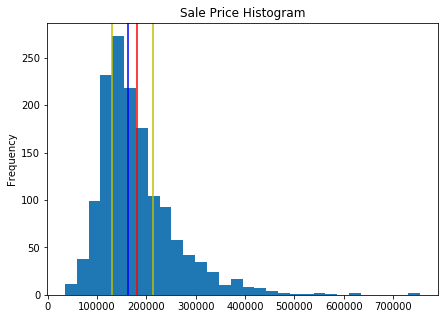

In [9]:
viz['SalePrice'].plot(kind='hist', bins=30, title='Sale Price Histogram', figsize=[7,5])
plt.axvline(viz.SalePrice.mean(), color='r', label='Mean')
plt.axvline(viz.SalePrice.median(), color='b', label='Median')
plt.axvline(viz.SalePrice.quantile(.25), color='y', label='25% Quantile')
plt.axvline(viz.SalePrice.quantile(.75), color='y', label='75% Quantile')
# Distribution of Sale Price

In [10]:
# Min and max of SalePrice
print("The cheapest house costs ${} and the most expensive one costs ${}".format(viz.SalePrice.min(), viz.SalePrice.max()))

The cheapest house costs $34900 and the most expensive one costs $755000


In [11]:
viz.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [12]:
# Separate variables into categorical and numerical for easier analysis

categorical_cols = []
numerical_cols = []

for index, value in viz.dtypes.iteritems():
    if value == object:
        categorical_cols.append(index)
    else:
        numerical_cols.append(index)

In [13]:
print(len(categorical_cols), len(numerical_cols))

43 38


In [14]:
continuous_cols = []
discrete_cols = []


for col in numerical_cols:
    sr = pd.Series(viz[col])
    
    # If there are more than 15 unique values in the variable, we can assume it's continuous
    if len(sr.unique()) > 15:
        continuous_cols.append(col)
    else:
        discrete_cols.append(col)

In [15]:
print(len(continuous_cols), len(discrete_cols))

23 15


In [16]:
corrMatrix = viz[numerical_cols].corr()

In [17]:
corr_filtered = corrMatrix[((corrMatrix > 0.50) | (corrMatrix < -0.50)) & (corrMatrix != 1.0)].dropna(how='all', axis=1).dropna(how='all', axis=0)

corr_filtered


OverallQual  YearBuilt  YearRemodAdd  BsmtFinSF1  TotalBsmtSF  \
OverallQual           NaN   0.572323      0.550684         NaN     0.537808   
YearBuilt        0.572323        NaN      0.592855         NaN          NaN   
YearRemodAdd     0.550684   0.592855           NaN         NaN          NaN   
BsmtFinSF1            NaN        NaN           NaN         NaN     0.522396   
TotalBsmtSF      0.537808        NaN           NaN    0.522396          NaN   
1stFlrSF              NaN        NaN           NaN         NaN     0.819530   
2ndFlrSF              NaN        NaN           NaN         NaN          NaN   
GrLivArea        0.593007        NaN           NaN         NaN          NaN   
BsmtFullBath          NaN        NaN           NaN    0.649212          NaN   
FullBath         0.550600        NaN           NaN         NaN          NaN   
HalfBath              NaN        NaN           NaN         NaN          NaN   
BedroomAbvGr          NaN        NaN           NaN         NaN          NaN   
TotRmsAbvGrd          NaN        NaN           NaN         NaN          NaN   
GarageYrBlt      0.508785   0.764681      0.601408         NaN          NaN   
GarageCars       0.600671   0.537850           NaN         NaN          NaN   
GarageArea       0.562022        NaN           NaN         NaN          NaN   
SalePrice        0.790982   0.522897      0.507101         NaN     0.613581   

              1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  \
OverallQual        NaN       NaN   0.593007           NaN  0.550600       NaN   
YearBuilt          NaN       NaN        NaN           NaN       NaN       NaN   
YearRemodAdd       NaN       NaN        NaN           NaN       NaN       NaN   
BsmtFinSF1         NaN       NaN        NaN      0.649212       NaN       NaN   
TotalBsmtSF   0.819530       NaN        NaN           NaN       NaN       NaN   
1stFlrSF           NaN       NaN   0.566024           NaN       NaN       NaN   
2ndFlrSF           NaN       NaN   0.687501           NaN       NaN  0.609707   
GrLivArea     0.566024  0.687501        NaN           NaN  0.630012       NaN   
BsmtFullBath       NaN       NaN        NaN           NaN       NaN       NaN   
FullBath           NaN       NaN   0.630012           NaN       NaN       NaN   
HalfBath           NaN  0.609707        NaN           NaN       NaN       NaN   
BedroomAbvGr       NaN  0.502901   0.521270           NaN       NaN       NaN   
TotRmsAbvGrd       NaN  0.616423   0.825489           NaN  0.554784       NaN   
GarageYrBlt        NaN       NaN        NaN           NaN       NaN       NaN   
GarageCars         NaN       NaN        NaN           NaN       NaN       NaN   
GarageArea         NaN       NaN        NaN           NaN       NaN       NaN   
SalePrice     0.605852       NaN   0.708624           NaN  0.560664       NaN   

              BedroomAbvGr  TotRmsAbvGrd  GarageYrBlt  GarageCars  GarageArea  \
OverallQual            NaN           NaN     0.508785    0.600671    0.562022   
YearBuilt              NaN           NaN     0.764681    0.537850         NaN   
YearRemodAdd           NaN           NaN     0.601408         NaN         NaN   
BsmtFinSF1             NaN           NaN          NaN         NaN         NaN   
TotalBsmtSF            NaN           NaN          NaN         NaN         NaN   
1stFlrSF               NaN           NaN          NaN         NaN         NaN   
2ndFlrSF          0.502901      0.616423          NaN         NaN         NaN   
GrLivArea         0.521270      0.825489          NaN         NaN         NaN   
BsmtFullBath           NaN           NaN          NaN         NaN         NaN   
FullBath               NaN      0.554784          NaN         NaN         NaN   
HalfBath               NaN           NaN          NaN         NaN         NaN   
BedroomAbvGr           NaN      0.676620          NaN         NaN         NaN   
TotRmsAbvGrd      0.676620           NaN          NaN         NaN         NaN  

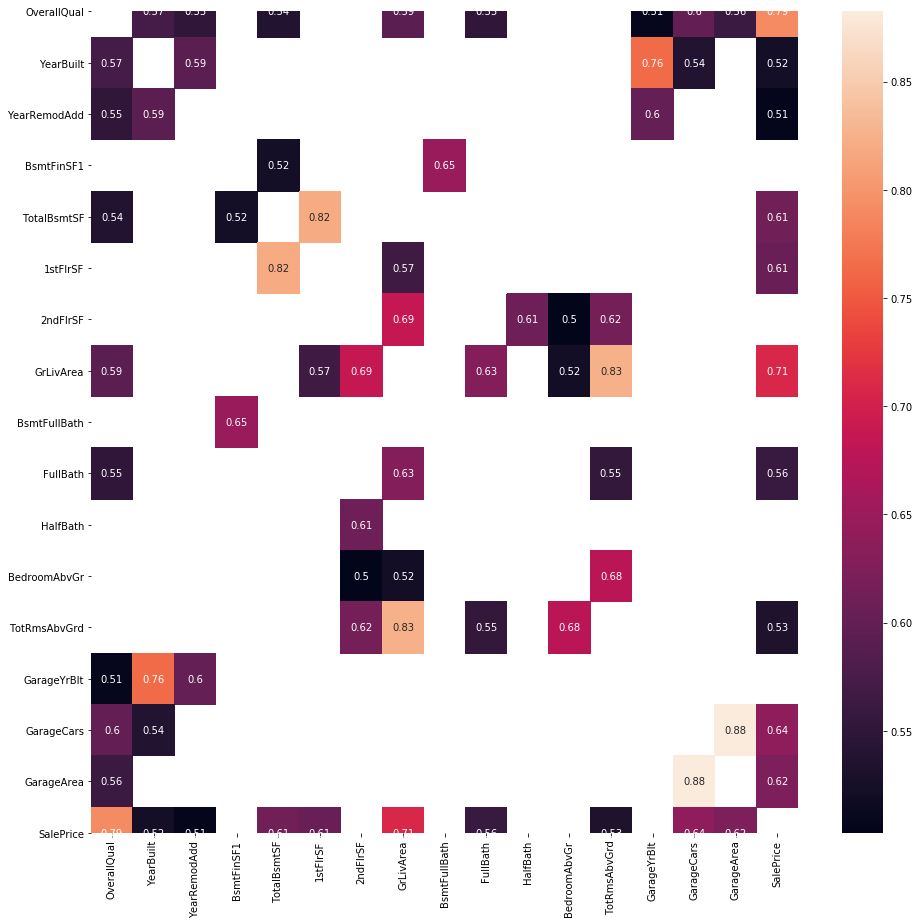

In [18]:
plt.subplots(figsize=(13,12))
plt.tight_layout()
_ = sns.heatmap(corr_filtered, annot=True)

# This heatmaps shows the correlation of only the features that have more than .5 correlation.
# The higher correlation features can be used to do PCA in the modeling step

In [19]:
# Get all variables with > .5 correlation with SalePrice

salePrice_corr = corrMatrix[(corrMatrix > 0.50) & (corrMatrix != 1.0)].dropna(how='all', axis=1).dropna(how='all', axis=0).loc['SalePrice'].dropna()

# These features could be a good candidate for a baseline model
salePrice_corr

OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
GarageCars      0.640409
GarageArea      0.623431
Name: SalePrice, dtype: float64

In [20]:
high = salePrice_corr.index.to_list()

In [21]:
# Categorical correlation

In [22]:
from scipy.stats import chi2_contingency

# Function to find cramers value for two categorical variables
def cramers_v(x,y):
    """Function to find the cramers value for two categorical variables"""
    confusion_matrix = pd.crosstab(x,y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r,k = confusion_matrix.shape
    return (chi2/(n*min((k-1),(r-1))))**.5
    
# List of categorical columns from before
categorical_cols
with_cat = viz.copy()

# Transform sale price into a categorical variable
with_cat['saleprice_category'] = pd.cut(viz['SalePrice'], 5)

# Create a dictionary that will show cramers value of target with all the other categorical variables
category_target_cramerv = {}

# Iterate through the cols  
for col in categorical_cols:
    x = with_cat[col]
    y = with_cat['saleprice_category']
    category_target_cramerv[col+'/saleprice'] = cramers_v(x,y)

# Sort the category_target_cramerv so you get the high correlations on top
category_target_cramerv = sorted(category_target_cramerv.items(), key = lambda x : x[1], reverse=True)

In [23]:
category_target_cramerv

# This shows the categorical features that have the highest correlation with SalePrice

[('ExterQual/saleprice', 0.44569856738553454),
 ('KitchenQual/saleprice', 0.42997279399618005),
 ('Neighborhood/saleprice', 0.42830205969477086),
 ('BsmtQual/saleprice', 0.37550674643419657),
 ('GarageFinish/saleprice', 0.34069750943028415),
 ('Foundation/saleprice', 0.26783475834637094),
 ('FireplaceQu/saleprice', 0.26365334596519735),
 ('GarageType/saleprice', 0.257567306861602),
 ('Exterior2nd/saleprice', 0.2448961318508167),
 ('BsmtFinType1/saleprice', 0.233384501653012),
 ('Exterior1st/saleprice', 0.23206214095222713),
 ('MasVnrType/saleprice', 0.228124697840127),
 ('HeatingQC/saleprice', 0.2226059068617394),
 ('PoolQC/saleprice', 0.2061451847908341),
 ('CentralAir/saleprice', 0.19442548873985072),
 ('SaleType/saleprice', 0.187106774354361),
 ('BsmtExposure/saleprice', 0.18551777021039623),
 ('SaleCondition/saleprice', 0.18191883341487636),
 ('LotShape/saleprice', 0.18112027214176532),
 ('HouseStyle/saleprice', 0.17512221809564202),
 ('MSZoning/saleprice', 0.16784580989090658),
 (

In [24]:
# Preparing the data for testing the LR models

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Using only the highest correlated variable, OverallQual
X = viz['OverallQual'].values.reshape(-1,1)
y = viz['SalePrice'].values.reshape(-1,1)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:

regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
prediction_space = np.linspace(min(X), max(X)).reshape(-1,1)

In [28]:
# What does it mean we predict the prediction space here?
y_pred = regressor.predict(prediction_space)

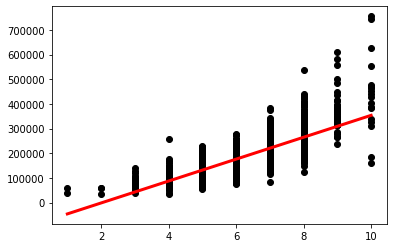

In [29]:
plt.scatter(X, y, color='black')
plt.plot(prediction_space, y_pred, color='red', linewidth=3)
plt.show()

In [30]:
# This is the score of the LR with just this one variable
regressor.score(X_test, y_test)

0.6504677778896862

In [31]:
# This is the training score
regressor.score(X_train, y_train)

# Underfitting with this single variable

0.6170962665508342

In [32]:
## Now we create another linear regression with all the Numeric variables, for comparison

X1 = viz[numerical_cols].drop('SalePrice', axis=1).values
y1 = viz['SalePrice'].values

In [33]:
X1.shape, y1.shape

((1460, 37), (1460,))

In [34]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [35]:
reg1 = LinearRegression()  
reg1.fit(X1_train, y1_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
# Why do I get an error here?
y_pred1 = reg1.predict(X1_test)

In [37]:
reg1.score(X1_test, y1_test)

0.8256389437242928

In [38]:
reg1.score(X1_train, y1_train)

# Pretty close to each other, not overfitting

0.8061637979969615

In [39]:
# Now we create a third one with the highest correlated values

X2 = viz[high].values
y2 = viz['SalePrice'].values

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

reg2 = LinearRegression()  
reg2.fit(X2_train, y2_train) 

reg2.score(X2_test, y2_test)

0.7968483304281101

In [40]:
reg2.score(X2_train, y2_train)
# Pretty close to each other, not overfitting

0.7647556828674686

In [41]:
y_pred2 = reg2.predict(X2_test)

In [42]:
# Lastly a fourth one with some PCA-selected variables

In [43]:
# Getting the variables correlated between .7 and .9
corr_high = corrMatrix[(corrMatrix > 0.70) & (corrMatrix < 0.90) & (corrMatrix != 1.0)].drop('SalePrice').drop('SalePrice', axis=1).dropna(how='all', axis=1).dropna(how='all', axis=0)


In [44]:
corr_high

YearBuilt  TotalBsmtSF  1stFlrSF  GrLivArea  TotRmsAbvGrd  \
YearBuilt           NaN          NaN       NaN        NaN           NaN   
TotalBsmtSF         NaN          NaN   0.81953        NaN           NaN   
1stFlrSF            NaN      0.81953       NaN        NaN           NaN   
GrLivArea           NaN          NaN       NaN        NaN      0.825489   
TotRmsAbvGrd        NaN          NaN       NaN   0.825489           NaN   
GarageYrBlt    0.764681          NaN       NaN        NaN           NaN   
GarageCars          NaN          NaN       NaN        NaN           NaN   
GarageArea          NaN          NaN       NaN        NaN           NaN   

              GarageYrBlt  GarageCars  GarageArea  
YearBuilt        0.764681         NaN         NaN  
TotalBsmtSF           NaN         NaN         NaN  
1stFlrSF              NaN         NaN         NaN  
GrLivArea             NaN         NaN         NaN  
TotRmsAbvGrd          NaN         NaN         NaN  
GarageYrBlt           NaN         NaN         NaN  
GarageCars            NaN         NaN    0.882475  
GarageArea            NaN    0.882475         NaN

In [45]:
cols_high = corr_high.columns.to_list()

In [46]:
# Scale values
from sklearn.preprocessing import StandardScaler
x_corr_data1 = viz[['TotalBsmtSF', '1stFlrSF']]
x_corr_data2 = viz[['GrLivArea', 'TotRmsAbvGrd']]
x_corr_data3 = viz[['GarageCars', 'GarageArea']]
# Standardizing the features
pairs = []
for dat in [x_corr_data1, x_corr_data2, x_corr_data3]:
    pairs.append(StandardScaler().fit_transform(dat))
len(pairs)

3

In [47]:
# Execute PCA
from sklearn.decomposition import PCA

new_components = []
for pair in pairs:
    pca = PCA(n_components=1)
    new_components.append(pca.fit_transform(pair))
len(new_components)

3

In [48]:
df_with_pca = viz[numerical_cols].drop(['SalePrice', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea'], axis=1)

for i, pca in enumerate(new_components):
    comp = pca.flatten()
    df_with_pca[f'pca{i}'] =  comp
                        

In [49]:
df_with_pca.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'Fireplaces', 'GarageYrBlt', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'pca0', 'pca1', 'pca2'],
      dtype='object')

In [50]:
# Run the linear regression with the new PCA numerical columns


X3 = df_with_pca.values
y3 = viz['SalePrice'].values

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

reg3 = LinearRegression()  
reg3.fit(X3_train, y3_train) 

reg3.score(X3_test, y3_test)

0.8255523060120646

In [51]:
reg3.score(X3_train, y3_train)
# Pretty close to each other, not overfitting

0.8052848310431742

In [52]:
y_pred3 = reg3.predict(X3_test)

In [53]:
# Let's encode now the Categorical values

# Getting the 10 highest correlated categorical values
cat = category_target_cramerv[:10]
cat

[('ExterQual/saleprice', 0.44569856738553454),
 ('KitchenQual/saleprice', 0.42997279399618005),
 ('Neighborhood/saleprice', 0.42830205969477086),
 ('BsmtQual/saleprice', 0.37550674643419657),
 ('GarageFinish/saleprice', 0.34069750943028415),
 ('Foundation/saleprice', 0.26783475834637094),
 ('FireplaceQu/saleprice', 0.26365334596519735),
 ('GarageType/saleprice', 0.257567306861602),
 ('Exterior2nd/saleprice', 0.2448961318508167),
 ('BsmtFinType1/saleprice', 0.233384501653012)]

In [54]:
cat_all = ['ExterQual', 'KitchenQual', 
           'Neighborhood', 'BsmtQual', 
           'GarageFinish', 'Foundation', 'FireplaceQu', 
           'GarageType', 'Exterior2nd', 'BsmtFinType1']

In [55]:
for col in cat_all:
    print(col)
    print(viz[col].unique())
    

ExterQual
['Gd' 'TA' 'Ex' 'Fa']
KitchenQual
['Gd' 'TA' 'Ex' 'Fa']
Neighborhood
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
BsmtQual
['Gd' 'TA' 'Ex' 'None' 'Fa']
GarageFinish
['RFn' 'Unf' 'Fin' 'None']
Foundation
['PConc' 'CBlock' 'BrkTil' 'Wood' 'Slab' 'Stone']
FireplaceQu
['None' 'TA' 'Gd' 'Fa' 'Ex' 'Po']
GarageType
['Attchd' 'Detchd' 'BuiltIn' 'CarPort' 'None' 'Basment' '2Types']
Exterior2nd
['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'Brk Cmn' 'ImStucc' 'AsphShn' 'Stone'
 'Other' 'CBlock']
BsmtFinType1
['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' 'None' 'LwQ']


In [56]:
nominal_var = ['Neighborhood', 'GarageFinish', 'Foundation', 'GarageType', 'Exterior2nd', 'BsmtFinType1']
ordinal_var = ['ExterQual', 'KitchenQual', 'BsmtQual', 'FireplaceQu']

In [57]:
# Duplicate df just to be safe
features = viz.copy(deep=True)

In [58]:
quality_order = {'None': 0, 'Po': 1, 'Fa': 2, 
               'TA': 3, 'Gd': 4, 'Ex': 5}

In [59]:
for col in ordinal_var:
    features[f'{col}_transformed'] = features[col].map(quality_order)

In [60]:
# Transforming nominal attributes 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

for col in nominal_var:
    gle = LabelEncoder()
    col_labels = gle.fit_transform(features[col])
    col_mappings = {index: label for index, label in 
                      enumerate(gle.classes_)}
    # Swith keys and values
    col_mappings = dict((y,x) for x,y in col_mappings.items())
    print(col_mappings)
    features[f'{col}_transformed'] = features[col].map(col_mappings)
    
    # One-hot encoding here
    ohe = OneHotEncoder()
    feature_arr = ohe.fit_transform(
                                  features[[col]]).toarray()
    feature_labels = list(gle.classes_)
    feat_new = pd.DataFrame(feature_arr, 
                                columns=feature_labels)
    features = pd.concat([features, feat_new], axis=1)

{'Blmngtn': 0, 'Blueste': 1, 'BrDale': 2, 'BrkSide': 3, 'ClearCr': 4, 'CollgCr': 5, 'Crawfor': 6, 'Edwards': 7, 'Gilbert': 8, 'IDOTRR': 9, 'MeadowV': 10, 'Mitchel': 11, 'NAmes': 12, 'NPkVill': 13, 'NWAmes': 14, 'NoRidge': 15, 'NridgHt': 16, 'OldTown': 17, 'SWISU': 18, 'Sawyer': 19, 'SawyerW': 20, 'Somerst': 21, 'StoneBr': 22, 'Timber': 23, 'Veenker': 24}
{'Fin': 0, 'None': 1, 'RFn': 2, 'Unf': 3}
{'BrkTil': 0, 'CBlock': 1, 'PConc': 2, 'Slab': 3, 'Stone': 4, 'Wood': 5}
{'2Types': 0, 'Attchd': 1, 'Basment': 2, 'BuiltIn': 3, 'CarPort': 4, 'Detchd': 5, 'None': 6}
{'AsbShng': 0, 'AsphShn': 1, 'Brk Cmn': 2, 'BrkFace': 3, 'CBlock': 4, 'CmentBd': 5, 'HdBoard': 6, 'ImStucc': 7, 'MetalSd': 8, 'Other': 9, 'Plywood': 10, 'Stone': 11, 'Stucco': 12, 'VinylSd': 13, 'Wd Sdng': 14, 'Wd Shng': 15}
{'ALQ': 0, 'BLQ': 1, 'GLQ': 2, 'LwQ': 3, 'None': 4, 'Rec': 5, 'Unf': 6}


In [61]:
features.shape

(1460, 156)

In [62]:
# Drop original categorical columns
features = features.drop(categorical_cols, axis=1)


In [63]:
features.shape

(1460, 113)

In [64]:
# Now let's fit another linear regression model with all numerical features plus this transformed categorical features


# Prepare regression
X4 = features.drop(['SalePrice'], axis=1).values
y4 = features['SalePrice'].values

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=42)

reg4 = LinearRegression()  
reg4.fit(X4_train, y4_train) 

display(reg4.score(X4_test, y4_test))
display(reg4.score(X4_train, y4_train))

0.859354637177608

0.8583292438275094

In [ ]:
# Regularized linear regression: lasso, ridge
# GridSearch Decision Tree
# Reduce DTR overfitting (with results from GridSearch, and then reduce parameters)
# Interpret the model: for LR, get coefficients for the variables
# Plot the decision tree

In [72]:
# Regularized linear regression: lasso, ridge

from sklearn import linear_model

# Lasso regression
las = linear_model.Lasso(alpha=0.1)

las.fit(X4_train, y4_train) 

display(las.score(X4_train, y4_train))
display(las.score(X4_test, y4_test))


/Users/josemontoro/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 455447835476.21967, tolerance: 696659484.3571944
  positive)


0.8583292269481102

0.8593608945137824

In [102]:
feat_names = features.drop('SalePrice', axis=1).columns.to_list()

In [73]:
# Ridge regression

ridge = linear_model.Ridge(alpha=.5)

ridge.fit(X4_train, y4_train) 

display(ridge.score(X4_train, y4_train))
display(ridge.score(X4_test, y4_test))

0.8582841545653321

0.8600378824029723

In [96]:
# Interpret the model: for LR, get coefficients for the variables 

coeffs = pd.DataFrame({})
models = [ridge, las, reg4]
names = ["Ridge", "Lasso", "Regular"]

for model, name in zip(models, names):
    mod = pd.DataFrame({name:model.coef_})
    coeffs = pd.concat([coeffs, mod], axis=1)

coeffs

Ridge         Lasso       Regular
0       -0.998907     -0.957703     -0.957517
1     -217.520257   -217.361830   -217.371081
2      -30.660472    -30.609170    -30.607590
3        0.428059      0.424381      0.424317
4    10551.581072  10466.526291  10465.292887
5     5083.472640   5095.619153   5095.518652
6       87.930197     82.109556     81.992143
7        5.994875      7.081875      7.091861
8        8.380785      8.247708      8.244500
9        2.757967      4.237534      2.821298
10      -1.165506      0.334133     -1.081172
11       1.267084      2.780680      1.365115
12       2.859527      1.685255      3.105242
13       8.769704     29.827876      8.364408
14       7.372382     28.738070      7.277708
15       9.075901     30.916915      9.463030
16      25.217939      3.648213     25.105146
17    9890.665047   9923.455612   9925.371333
18    1629.234961   1699.416492   1700.676255
19    7292.551875   7364.845008   7366.817357
20    3997.443822   4133.934267   4136.809008
21   -4017.486574  -3950.901864  -3949.958029
22   -7093.206093  -7257.913664  -7260.751051
23    4632.512213   4654.826542   4654.846879
24    5230.988842   5313.230618   5315.363390
25     -41.281652    -43.119260    -43.178690
26   12834.004555  12802.720400  12804.526846
27       9.519347      9.845207      9.851345
28      21.609383     21.844172     21.848258
29     -11.953769    -11.868333    -11.869426
30       3.064601      3.020120      3.018600
31      73.853843     75.607206     75.638225
32      61.660650     61.577114     61.574281
33       8.493521      8.277514      8.283447
34      -0.185473     -0.184368     -0.184345
35    -340.817574   -341.533295   -341.738717
36    -632.687786   -624.463513   -624.577526
37    3255.999691   3022.358578   3020.128113
38    7161.882002   7095.867683   7095.737573
39   10600.403271  10788.016771  10790.659164
40    -120.358269   -158.287129   -159.166504
41     979.644976    732.248119   1035.022064
42    1409.583230   1894.416184   2827.243336
43   -7991.445763 -12180.308179 -11687.527244
44    3095.252276   3089.484697   3407.269989
45   10037.784727  10415.545677  10419.657306
46   12329.789769  13474.552949  13184.939283
47    2602.840823   3977.168886   3383.418799
48   21579.281895  22996.876787  22096.250420
49  -11645.163269 -10386.837947 -11596.455181
50   -9949.099315  -7943.484790  -9447.995490
51   -7662.816773  -6059.373703  -7878.719600
52  -11138.117424  -9955.810923 -12090.562098
53  -11386.255241  -9039.387789 -11456.530328
54  -10325.799042  -7760.680656 -10483.088988
55   -1965.116258   1720.679958  -1251.203107
56  -19399.236475 -16303.684299 -19629.798908
57   32975.382404  37316.737692  33698.634606
58   34814.388130  39521.362533  35601.018491
59  -16524.403162 -12881.979297 -17122.396866
60  -13749.759741 -10207.180044 -14753.705450
61  -14620.177639 -10438.969778 -15281.413926
62  -19043.295193 -14395.572613 -19536.470574
63    2274.841425   7698.702572   2262.265102
64   39273.090833  46418.995672  40692.723555
65  -12024.257135  -6303.792751 -12351.353540
66    7032.706917  13330.049347   6993.800414
67   -1611.767935  -1339.892281  -1596.651877
68   -1756.898398  -1055.754357  -1765.675225
69    5620.713399  18877.783920   5673.846577
70   -4358.963669  -4257.069546  -4454.015600
71     495.148668    481.633150    545.844249
72    -592.178165   2322.636538   -914.681063
73   -7446.086164  -3188.295895  -7953.365209
74      13.922662   1438.314736    -87.673408
75    1202.441807   -466.559283   1240.627377
76   10357.045862   5693.918530  10660.915237
77   13445.501193   7773.773487  15988.488136
78  -17572.825360 -31223.415790 -19848.992133
79    2636.050186   -272.740642   2689.762601
80  -11078.310070 -22098.850449 -11879.790728
81    6973.132281      0.000000   7285.388851
82    9856.797607   6544.023006  10882.194312
83    6698.660340   5618.259075   6981.961057
84  -12484.029060 -11746.591808 -13369.022840
85   -5586.964497  -1007.488173  -5574.577229
86    5620

In [104]:
coeffs.index = feat_names
coeffs

Ridge         Lasso       Regular
Id                           -0.998907     -0.957703     -0.957517
MSSubClass                 -217.520257   -217.361830   -217.371081
LotFrontage                 -30.660472    -30.609170    -30.607590
LotArea                       0.428059      0.424381      0.424317
OverallQual               10551.581072  10466.526291  10465.292887
OverallCond                5083.472640   5095.619153   5095.518652
YearBuilt                    87.930197     82.109556     81.992143
YearRemodAdd                  5.994875      7.081875      7.091861
MasVnrArea                    8.380785      8.247708      8.244500
BsmtFinSF1                    2.757967      4.237534      2.821298
BsmtFinSF2                   -1.165506      0.334133     -1.081172
BsmtUnfSF                     1.267084      2.780680      1.365115
TotalBsmtSF                   2.859527      1.685255      3.105242
1stFlrSF                      8.769704     29.827876      8.364408
2ndFlrSF                      7.372382     28.738070      7.277708
LowQualFinSF                  9.075901     30.916915      9.463030
GrLivArea                    25.217939      3.648213     25.105146
BsmtFullBath               9890.665047   9923.455612   9925.371333
BsmtHalfBath               1629.234961   1699.416492   1700.676255
FullBath                   7292.551875   7364.845008   7366.817357
HalfBath                   3997.443822   4133.934267   4136.809008
BedroomAbvGr              -4017.486574  -3950.901864  -3949.958029
KitchenAbvGr              -7093.206093  -7257.913664  -7260.751051
TotRmsAbvGrd               4632.512213   4654.826542   4654.846879
Fireplaces                 5230.988842   5313.230618   5315.363390
GarageYrBlt                 -41.281652    -43.119260    -43.178690
GarageCars                12834.004555  12802.720400  12804.526846
GarageArea                    9.519347      9.845207      9.851345
WoodDeckSF                   21.609383     21.844172     21.848258
OpenPorchSF                 -11.953769    -11.868333    -11.869426
EnclosedPorch                 3.064601      3.020120      3.018600
3SsnPorch                    73.853843     75.607206     75.638225
ScreenPorch                  61.660650     61.577114     61.574281
PoolArea                      8.493521      8.277514      8.283447
MiscVal                      -0.185473     -0.184368     -0.184345
MoSold                     -340.817574   -341.533295   -341.738717
YrSold                     -632.687786   -624.463513   -624.577526
ExterQual_transformed      3255.999691   3022.358578   3020.128113
KitchenQual_transformed    7161.882002   7095.867683   7095.737573
BsmtQual_transformed      10600.403271  10788.016771  10790.659164
FireplaceQu_transformed    -120.358269   -158.287129   -159.166504
Neighborhood_transformed    979.644976    732.248119   1035.022064
Blmngtn                    1409.583230   1894.416184   2827.243336
Blueste                   -7991.445763 -12180.308179 -11687.527244
BrDale                     3095.252276   3089.484697   3407.269989
BrkSide                   10037.784727  10415.545677  10419.657306
ClearCr                   12329.789769  13474.552949  13184.939283
CollgCr                    2602.840823   3977.168886   3383.418799
Crawfor                   21579.281895  22996.876787  22096.250420
Edwards                  -11645.163269 -10386.837947 -11596.455181
Gilbert                   -9949.099315  -7943.484790  -9447.995490
IDOTRR                    -7662.816773  -6059.373703  -7878.719600
MeadowV                  -11138.117424  -9955.810923 -12090.562098
Mitchel                  -11386.255241  -9039.387789 -11456.530328
NAmes                    -10325.799042  -7760.680656 -10483.088988
NPkVill                   -1965.116258   1720.679958  -1251.203107
NWAmes                   -19399.236475 -16303.684299 -19629.798908
NoRidge                   32975.382404  37316.737692  33698.634606
NridgHt                   34814.388130  39521.362533  35601.018491
OldTown      

In [66]:
# Decision Tree

from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()  
dtr.fit(X4_train, y4_train) 

display(dtr.score(X4_train, y4_train))
display(dtr.score(X4_test, y4_test))

1.0

0.7717773725431372

In [80]:
# GridSearch Decision Tree
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': np.arange(1, 50)}

tree = GridSearchCV(DecisionTreeRegressor(), param_grid)

tree.fit(X4_train, y4_train)

display(tree.score(X4_train, y4_train))
display(tree.score(X4_test, y4_test))

# How come the test score here is lower than before with no parameter?

0.980490870118585

0.7339687825990897

In [81]:
print(tree.best_params_, tree.best_score_)

{'max_depth': 9} 0.7204674547201835


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.430997 to fit



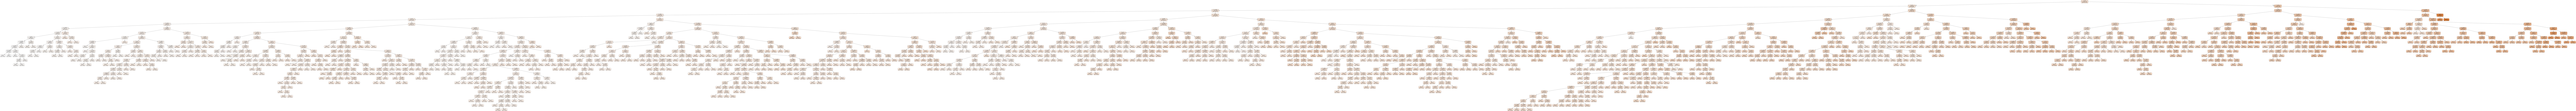

In [87]:
# Plot the decision tree

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(dtr, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())